<a href="https://colab.research.google.com/github/Cody-coder017/Getting-started-with-nlp/blob/main/Luhn_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import re
import nltk
import string
import heapq # to order the sentences

In [183]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [184]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [185]:
original_text="""Artificial intelligence is human like intelligence machines. 
                   It is the study of intelligent artificial agents. 
                   Science and engineering to produce intelligent machines. 
                   Solve problems and have intelligence. 
                   Related to intelligent behavior. 
                   Developing of reasoning machines. 
                   Learn from mistakes and successes. 
                   Artificial intelligence is related to reason"""

In [186]:
original_text=re.sub(r'\s+',' ',original_text)
original_text

'Artificial intelligence is human like intelligence machines. It is the study of intelligent artificial agents. Science and engineering to produce intelligent machines. Solve problems and have intelligence. Related to intelligent behavior. Developing of reasoning machines. Learn from mistakes and successes. Artificial intelligence is related to reason'

In [187]:
stopwords=nltk.corpus.stopwords.words('english')
print(stopwords) #not important to understand

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [188]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [189]:
formatted_text=preprocess(original_text)
formatted_text

'artificial intelligence human like intelligence machines study intelligent artificial agents science engineering produce intelligent machines solve problems intelligence related intelligent behavior developing reasoning machines learn mistakes successes artificial intelligence related reason'

In [190]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
    #print('------------')
    #print(sentence)
    word_index = []
    for word in important_words:
      #print(word)
      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 5]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score=0
    for g in groups_list:
      #print(g)
      important_words_in_group=len(g)
      total_words_in_group=g[-1]-g[0]+1
      score=1.0*important_words_in_group**2/total_words_in_group
      #print("group score",score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score,sentence,sentence_index))  
    sentence_index+=1

  #print('final_scores',scores) 
  return scores



In [191]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
    #print('------------')
    #print(sentence)

    word_index = []
    for word in important_words:
      #print(word)
      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 5]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score = 0
    for g in groups_list:
      #print(g)
      important_words_in_group = len(g)
      total_words_in_group = g[-1] - g[0] + 1
      score = 1.0 * important_words_in_group**2 / total_words_in_group
      #print('group score', score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score, sentence_index))
    sentence_index += 1

  #print('final scores', scores)
  return scores

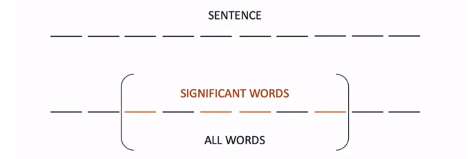

In [192]:
def summarize(text,top_n_words,distance,number_of_sentences):
    original_sentences=[sentence for sentence in nltk.sent_tokenize(text)]
    #print(original_sentences)
    formatted_sentences=[preprocess(original_sentence) for original_sentence in original_sentences]
    #print(formatted_sentences)
    words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)] 
    #print(words)
    frequency = nltk.FreqDist(words)
    #print(frequency)
    #return frequency 
    top_n_words=[word[0] for word in frequency.most_common(top_n_words)]
    #print(top_n_words)
    sentences_score=calculate_sentences_score(formatted_sentences,top_n_words,distance)
    #print(sentences_Score)
    best_sentences=heapq.nlargest(number_of_sentences,sentences_score)
    #print(best_sentences)
    #best_sentences=[original_sentences[i] for(score,i) in best_sentences]
    return original_sentences,best_sentences,sentences_score

In [193]:
def summarize(text, top_n_words, distance, number_of_sentences, percentage = 0):
  original_sentences = [sentence for sentence in nltk.sent_tokenize(text)]
  #print(original_sentences)
  formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  #print(formatted_sentences)
  words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
  #print(words)
  frequency = nltk.FreqDist(words)
  #print(frequency)
  #return frequency
  top_n_words = [word[0] for word in frequency.most_common(top_n_words)]
  #print(top_n_words)
  sentences_score = calculate_sentences_score(formatted_sentences, top_n_words, distance)
  #print(sentences_score)
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * percentage), sentences_score)
  else:  
    best_sentences = heapq.nlargest(number_of_sentences, sentences_score)
  #print(best_sentences)
  best_sentences = [original_sentences[i] for (score, i) in best_sentences]
  #print(best_sentences)
  return original_sentences, best_sentences, sentences_score

In [194]:
original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 3)

In [195]:
original_sentences

['Artificial intelligence is human like intelligence machines.',
 'It is the study of intelligent artificial agents.',
 'Science and engineering to produce intelligent machines.',
 'Solve problems and have intelligence.',
 'Related to intelligent behavior.',
 'Developing of reasoning machines.',
 'Learn from mistakes and successes.',
 'Artificial intelligence is related to reason']

In [196]:
best_sentences 

['Learn from mistakes and successes.',
 'Related to intelligent behavior.',
 'Science and engineering to produce intelligent machines.']

In [197]:
from IPython.core.display import HTML

In [198]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

In [199]:
visualize("AI",original_sentences,best_sentences)

In [200]:
# Extracting Texts from the internet

In [201]:
!pip install goose3

In [202]:
from goose3 import Goose

In [203]:
g=Goose()
url="https://en.wikipedia.org/wiki/2022_Russian_invasion_of_Ukraine"
article=g.extract(url)

In [204]:
print(article)

In [205]:
article.cleaned_text

'On 24 February 2022, Russia launched a large-scale invasion of Ukraine, its neighbour to the southwest, marking the largest escalation of the ongoing Russo-Ukrainian War that began in 2014. The campaign was preceded by a prolonged Russian military build-up beginning in early 2021; Russia demanded that Ukraine should be legally prohibited from joining the NATO military alliance.[31] Days prior to the invasion, Russia recognised two self-proclaimed states within Ukraine\'s borders: the Donetsk People\'s Republic and the Luhansk People\'s Republic. Russian Armed Forces entered the Donbas region in eastern Ukraine on 21 February. On 22 February, the Federation Council unanimously authorised the President of Russia — Vladimir Putin — to use military force outside Russia.\n\nAround 05:00 local time (06:00 Moscow Time) on 24 February, the President of Russia announced a "special military operation" in eastern Ukraine; minutes later, missile strikes began at locations across Ukraine, includin

In [206]:
original_sentences,best_sentences,score_sentences=summarize(article.cleaned_text,300,10,120)

In [207]:
len(original_sentences)

244

In [208]:
(120/len(original_sentences))*100

49.18032786885246

In [209]:
original_sentences

['On 24 February 2022, Russia launched a large-scale invasion of Ukraine, its neighbour to the southwest, marking the largest escalation of the ongoing Russo-Ukrainian War that began in 2014.',
 'The campaign was preceded by a prolonged Russian military build-up beginning in early 2021; Russia demanded that Ukraine should be legally prohibited from joining the NATO military alliance.',
 "[31] Days prior to the invasion, Russia recognised two self-proclaimed states within Ukraine's borders: the Donetsk People's Republic and the Luhansk People's Republic.",
 'Russian Armed Forces entered the Donbas region in eastern Ukraine on 21 February.',
 'On 22 February, the Federation Council unanimously authorised the President of Russia — Vladimir Putin — to use military force outside Russia.',
 'Around 05:00 local time (06:00 Moscow Time) on 24 February, the President of Russia announced a "special military operation" in eastern Ukraine; minutes later, missile strikes began at locations across U

In [210]:
best_sentences

['Around 05:00 local time (06:00 Moscow Time) on 24 February, the President of Russia announced a "special military operation" in eastern Ukraine; minutes later, missile strikes began at locations across Ukraine, including the capital Kyiv.',
 '[98][99][100][101] Ukrainian media reported a sharp increase in artillery shelling by the Russian-led militants in Donbas as attempts to provoke the Ukrainian army.',
 'On 22 February, the Federation Council unanimously authorised the President of Russia — Vladimir Putin — to use military force outside Russia.',
 '"[133] Russia invaded while holding the presidency of the UN Security Council for February 2022, and has veto power as one of five permanent members.',
 "[110][111][112]\n\nOn 21 February, the Luhansk thermal power station in the Luhansk People's Republic was shelled by unknown forces.",
 '[256]\n\nWhile not directly addressing the invasion, on 23 February Kirill, Patriarch of Moscow and all Rus\' (Russian Orthodox Church), praised Pre

In [211]:
score_sentences

[(8.0, 0),
 (9.6, 1),
 (10.88888888888889, 2),
 (10.0, 3),
 (14.0625, 4),
 (20.833333333333332, 5),
 (5.444444444444445, 6),
 (9.0, 7),
 (10.88888888888889, 8),
 (4.454545454545454, 9),
 (6.230769230769231, 10),
 (8.166666666666666, 11),
 (5.538461538461538, 12),
 (4.571428571428571, 13),
 (3.5714285714285716, 14),
 (0.4444444444444444, 15),
 (1.0, 16),
 (3.125, 17),
 (4.9, 18),
 (2.272727272727273, 19),
 (3.125, 20),
 (5.761904761904762, 21),
 (9.0, 22),
 (2.272727272727273, 23),
 (3.5, 24),
 (6.368421052631579, 25),
 (8.0, 26),
 (4.0, 27),
 (3.272727272727273, 28),
 (4.05, 29),
 (2.2857142857142856, 30),
 (1.0, 31),
 (1.2857142857142858, 32),
 (4.266666666666667, 33),
 (8.1, 34),
 (6.230769230769231, 35),
 (11.255813953488373, 36),
 (6.368421052631579, 37),
 (1.0, 38),
 (4.0, 39),
 (3.6, 40),
 (5.785714285714286, 41),
 (2.6666666666666665, 42),
 (10.227272727272727, 43),
 (1.5, 44),
 (6.545454545454546, 45),
 (5.0625, 46),
 (8.166666666666666, 47),
 (3.5, 48),
 (1.0, 49),
 (5.8181818

In [212]:
visualize(article.title,original_sentences,best_sentences)

In [213]:
# From feeds


In [214]:
!pip install feedparser

In [215]:
import feedparser

In [238]:
from bs4 import BeautifulSoup # to remove html tags in article
import os
import json
url='https://www.aitrends.com/feed/'
feed=feedparser.parse(url)

In [239]:
feed.entries

[{'author': 'Allison Proffitt',
  'author_detail': {'name': 'Allison Proffitt'},
  'authors': [{'name': 'Allison Proffitt'}],
  'content': [{'base': 'https://www.aitrends.com/feed/',
    'language': None,
    'type': 'text/html',
    'value': '<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span>\xa0</span></p>\n<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0</span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span>\xa0event held in-person and virtually from Alexandria, Va., last week.</span><span>\xa0</span><sp

In [240]:
for e in feed.entries:
  print(e.title)
  print(e.content[0].value)
  print('------')


Best Practices for Building the AI Development Platform in Government
<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span> </span></p>
<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the </span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span> event held in-person and virtually from Alexandria, Va., last week.</span><span> </span><span> </span></p>
<figure class="wp-caption alignleft" id="attachment_21162" style="width: 168px;"><img alt="" class="size-full wp-image-21162" height="289" src="https://www.aitrends.com/wp

In [241]:
def clean_html(text):
  if text == ' ':
    return ''
  else:
    return BeautifulSoup(text,'html5lib').get_text()  

In [242]:
e.content[0].value

'<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-22ForbiddenKnowledge-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By Lance Eliot, the AI Trends Insider</span></i><span>\xa0</span><span>\xa0\xa0</span><span>\xa0</span></p>\n<p><span>Are there things that we must not know?\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>This is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.</span><span>\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>The typical basis for 

In [243]:
clean_html(e.content[0].value)

'By Lance Eliot, the AI Trends Insider\xa0\xa0\xa0\xa0\nAre there things that we must not know?\xa0\xa0\xa0\nThis is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.\xa0\xa0\xa0\nThe typical basis for wanting to forbid the discovery or emergence of forbidden knowledge is that the adverse consequences are overwhelming.\xa0The end result is so devastating and undercutting that the bad side outweighs the good that could be derived from the knowledge.\xa0\xa0\xa0\nIt is conceivable that there might be knowledge that is so bad that it has no good possibilities at all. Thus, rather than trying to ba

In [244]:
articles=[]
for e in feed.entries:
  articles.append({'title': e.title,'content':clean_html(e.content[0].value)})

In [245]:
articles

[{'content': 'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same ease\xa0with\xa0which a new smartphone carries over the user’s contacts and histori

In [246]:
import json
save_file = os.path.join('feed.json')
feed = open('feed.json', 'w+')
feed.write(json.dumps(articles, indent=1))
feed.close()